# Logan T Hernandez

## Research question/interests

**My part of the project will be exploring the change in housing prices, new housing construction, and population of canadian metropolitan areas over time.**

My research question is related to the change in available housing, cost, and population of canadian metropolitan areas. I believe that everyone under 30 is worried about the state of the housing market and availability of affordable living. With this concern in mind, I plan to visualize how the market has changed over time relative to population increases of metropolitan hubs. Since hubs provide the greatest opportunity for career advancement, people who want to earn high paying jobs often relocate to hubs; however, the cost of living in the hub also dictates its affordability, with the highest C.O.L. expenditure being housing. Therefore, my analysis will also attempt to determine the most affordable canadian metropolitan hub respective of housing cost and inventory.

## Part 1, Working (mainly) with PopEstimate DF

### Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style='whitegrid', font_scale=2)

DailyInterestRate = pd.read_csv("../data/raw/DailyInterestRates/DailyInterestRates.csv")
NewHousingPIndex = pd.read_csv("../data/raw/NewHousingPIndex/NewHousingPIndex.csv")
NewInventory = pd.read_csv("../data/raw/NewInventory/NewInventory.csv", low_memory = False)
PopEstimate = pd.read_csv("../data/raw/PopEstimate/PopEstimate.csv")

In [2]:
PopEstimate.head(5)

,REF_DATE,GEO,DGUID,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2001,Canada,2016A00001124,Both sexes,All ages,Persons,249,units,0,v1462635598,178.1.1,31020902.0,NaN,NaN,NaN,0
1,2001,Canada,2016A00001124,Both sexes,0 to 4 years,Persons,249,units,0,v1462635576,178.1.2,1754354.0,NaN,NaN,NaN,0
2,2001,Canada,2016A00001124,Both sexes,0 years,Persons,249,units,0,v1462635484,178.1.3,328494.0,NaN,NaN,NaN,0
3,2001,Canada,2016A00001124,Both sexes,1 year,Persons,249,units,0,v1462635485,178.1.4,345259.0,NaN,NaN,NaN,0
4,2001,Canada,2016A00001124,Both sexes,2 years,Persons,249,units,0,v1462635486,178.1.5,349563.0,NaN,NaN,NaN,0


### Data Cleaning
Theres quite a few columns here that are going to be erraneous for my analysis, so I'm first going to drop the columns that are not directly related to the general geographical location and to the population, and age of populants. 

In [3]:
PE_Wrangled = PopEstimate.drop(columns=['DGUID', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], axis=1).reset_index().drop(columns=["index"])
PE_Wrangled.sample(10)

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
825597,2014,"Rouyn-Noranda (CA), Quebec",Both sexes,9 years,Persons,373.0
941730,2016,"Rimouski (CA), Quebec",Males,0 to 14 years,Persons,3990.0
1033946,2017,"Duncan (CA), British Columbia",Females,79 years,Persons,177.0
186645,2004,"Saguenay (CMA), Quebec",Both sexes,All ages,Persons,159504.0
803731,2014,"Kingston (CMA), Ontario",Males,15 to 64 years,Persons,55326.0
542418,2009,"Duncan (CA), British Columbia",Both sexes,64 years,Persons,529.0
278917,2005,"Norfolk (CA), Ontario",Males,34 years,Persons,364.0
867822,2015,"Brantford (CMA), Ontario",Males,25 years,Persons,899.0
21623,2001,"Alma (CA), Quebec",Females,1 year,Persons,153.0
167630,2003,"High River (CA), Alberta",Females,61 years,Persons,55.0


This is a lot more concise already, and only includes values explicitly related to my analysis. Interestingly, the unit of measurement (UOM) column provides an additional level of data formatting that i can utilize later, as it will allow me to filter the data by average ages. I'm not sure if I will use this yet, however the analysis to do so will simply filter the wrangled dataset by UOM value == Persons or years. The same filter can be applied by using the age group category, however it will provide more explicit filtration as this category also inlcudes all age groups of each city's population. As for now, I will conduct some additional exploratory analysis using plots. 

In [4]:
PE_GB_GEO = PE_Wrangled.groupby('GEO').sum().reset_index().sort_values(by=['VALUE'], ascending=False)
PE_GB_GEO.head(20)

/var/folders/v9/f2hd85ns75q9chg2z10c7wcc0000gn/T/ipykernel_37624/188684402.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  PE_GB_GEO = PE_Wrangled.groupby('GEO').sum().reset_index().sort_values(by=['VALUE'], ascending=False)


,GEO,REF_DATE,VALUE
35,Canada,15267285,6.088087e+09
3,All census metropolitan areas and census agglo...,15267285,5.033420e+09
4,"All census metropolitan areas, Canada",15267285,4.283533e+09
1,All areas outside census metropolitan areas an...,15267285,1.054672e+09
158,"Toronto (CMA), Ontario",15267285,1.017752e+09
2,"All census agglomerations, Canada",15267285,7.498925e+08
95,"Montréal (CMA), Quebec",15267285,7.036907e+08
162,"Vancouver (CMA), British Columbia",15267285,4.241699e+08
16,Area outside census metropolitan areas and cen...,15267285,2.706236e+08
14,Area outside census metropolitan areas and cen...,15267285,2.490646e+08


This provides us with a brief description of the largest metropolitan areas in canada during the past 20 years on a combined value of total population summation from each year. Now, Ill start dropping the useless rows. First off, I'll drop 'Canada' and all other aggregated rows.

In [5]:
PE_ordered_filtered = PE_GB_GEO.drop(PE_GB_GEO[PE_GB_GEO.GEO.isin(['Canada',
                                                                'All areas outside census metropolitan areas and census agglomerations, Canada',
                                                                'All census agglomerations, Canada',
                                                                'All census metropolitan areas and census agglomerations, Canada',
                                                                'All census metropolitan areas, Canada','Area outside census metropolitan areas and census agglomerations, Alberta',
                                                                'Area outside census metropolitan areas and census agglomerations, British Columbia',
                                                                'Area outside census metropolitan areas and census agglomerations, Manitoba',
                                                                'Area outside census metropolitan areas and census agglomerations, New Brunswick',
                                                                'Area outside census metropolitan areas and census agglomerations, Newfoundland and Labrador',
                                                                'Area outside census metropolitan areas and census agglomerations, Northwest Territories',
                                                                'Area outside census metropolitan areas and census agglomerations, Nova Scotia',
                                                                'Area outside census metropolitan areas and census agglomerations, Nunavut',
                                                                'Area outside census metropolitan areas and census agglomerations, Ontario',
                                                                'Area outside census metropolitan areas and census agglomerations, Prince Edward Island',
                                                                'Area outside census metropolitan areas and census agglomerations, Quebec',
                                                                'Area outside census metropolitan areas and census agglomerations, Saskatchewan',
                                                                'Area outside census metropolitan areas and census agglomerations, Yukon',
                                                                'Ottawa - Gatineau (CMA), Ontario part, Ontario',
                                                                'Ottawa - Gatineau (CMA), Quebec part, Quebec'])].index).head(30).reset_index().drop(columns=["index"])
PE_ordered_filtered

,GEO,REF_DATE,VALUE
0,"Toronto (CMA), Ontario",15267285,1.017752e+09
1,"Montréal (CMA), Quebec",15267285,7.036907e+08
2,"Vancouver (CMA), British Columbia",15267285,4.241699e+08
3,"Ottawa - Gatineau (CMA), Ontario/Quebec",15267285,2.278083e+08
4,"Calgary (CMA), Alberta",15267285,2.269135e+08
5,"Edmonton (CMA), Alberta",15267285,2.165584e+08
6,"Québec (CMA), Quebec",15267285,1.360221e+08
7,"Winnipeg (CMA), Manitoba",15267285,1.345632e+08
8,"Hamilton (CMA), Ontario",15267285,1.316121e+08
9,"Kitchener - Cambridge - Waterloo (CMA), Ontario",15267285,9.163376e+07


### Minor Visual EDA
Great, now I can visualize the 30 largest metropolitan areas in Canada from their combined population counts for the past 20 years. These are the locations that I will assess in my analysis of housing inventory and price index. 


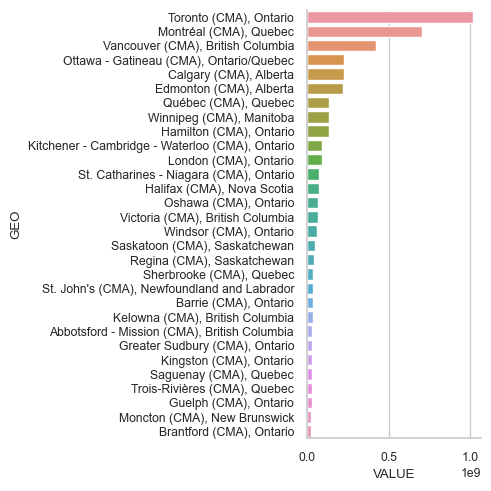

In [6]:
sns.set_theme(style='whitegrid', font_scale=0.8)
sns.catplot(data=PE_ordered_filtered, y='GEO', x='VALUE', kind='bar')
n=None

In [7]:
NewHousingPIndex.sample(10)

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
8387,1986-10,"Edmonton, Alberta",2011S0503835,Land only,"Index, 201612=100",347,units,0,v111955549,36.3,25.4,E,NaN,NaN,1
43013,2010-11,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",2011S050335505,Land only,"Index, 201612=100",347,units,0,v111955495,18.3,93.1,E,NaN,NaN,1
51702,2016-11,"Calgary, Alberta",2011S0503825,Total (house and land),"Index, 201612=100",347,units,0,v111955544,35.1,99.8,NaN,NaN,NaN,1
56052,2019-12,Prince Edward Island,2016A000211,Total (house and land),"Index, 201612=100",347,units,0,v111955454,5.1,102.0,E,NaN,NaN,1
54140,2018-08,Nova Scotia,2016A000212,Land only,"Index, 201612=100",347,units,0,v111955462,7.3,100.2,E,NaN,NaN,1
50070,2015-10,Quebec,2016A000224,Total (house and land),"Index, 201612=100",347,units,0,v111955472,11.1,99.1,NaN,NaN,NaN,1
55488,2019-07,Ontario,2016A000235,Total (house and land),"Index, 201612=100",347,units,0,v111955490,17.1,104.5,NaN,NaN,NaN,1
52235,2017-04,"Québec, Quebec",2011S0503421,Land only,"Index, 201612=100",347,units,0,v111955477,12.3,100.4,E,NaN,NaN,1
57964,2021-04,Atlantic Region,2016A00011,House only,"Index, 201612=100",347,units,0,v111955446,2.2,113.4,NaN,NaN,NaN,1
33198,2004-01,"Greater Sudbury, Ontario",2011S0503580,Total (house and land),"Index, 201612=100",347,units,0,v111955520,27.1,82.9,NaN,NaN,NaN,1


### More Data Cleaning

Similar to before, there's quite a few columns here that are going to be erraneous for my analysis, so I'm first going to drop the columns that are not directly related to the general geographical location and to the housing price.

In [8]:
NewHousingPIndex_Wrangled = NewHousingPIndex.drop(columns=['DGUID', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], axis=1).reset_index().drop(columns=["index"]) 
NewHousingPIndex_Wrangled

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,1981-01,Canada,Total (house and land),"Index, 201612=100",38.2
1,1981-01,Canada,House only,"Index, 201612=100",36.1
2,1981-01,Canada,Land only,"Index, 201612=100",40.6
3,1981-01,Atlantic Region,Total (house and land),"Index, 201612=100",NaN
4,1981-01,Atlantic Region,House only,"Index, 201612=100",NaN
...,...,...,...,...,...
60475,2022-12,"Vancouver, British Columbia",House only,"Index, 201612=100",126.8
60476,2022-12,"Vancouver, British Columbia",Land only,"Index, 201612=100",121.4
60477,2022-12,"Victoria, British Columbia",Total (house and land),"Index, 201612=100",125.0
60478,2022-12,"Victoria, British Columbia",House only,"Index, 201612=100",131.9


This is looking better, however there's way too much data compared to what I need for the analysis. My population estimates start in 2001, so I'm going to drop all data for the housing price index prior to 2001 after I ensure that the dates are correctly displayed in datetime format. 

In [9]:
NewHousingPIndex_Wrangled['REF_DATE'] = pd.to_datetime(NewHousingPIndex_Wrangled['REF_DATE'])

NHPI_W_v2 = NewHousingPIndex_Wrangled[~(NewHousingPIndex_Wrangled['REF_DATE'] < '2001-01-01')].reset_index().drop(columns=["index"])
NHPI_W_v2

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,2001-01-01,Canada,Total (house and land),"Index, 201612=100",58.7
1,2001-01-01,Canada,House only,"Index, 201612=100",55.5
2,2001-01-01,Canada,Land only,"Index, 201612=100",67.4
3,2001-01-01,Atlantic Region,Total (house and land),"Index, 201612=100",64.2
4,2001-01-01,Atlantic Region,House only,"Index, 201612=100",65.7
...,...,...,...,...,...
31675,2022-12-01,"Vancouver, British Columbia",House only,"Index, 201612=100",126.8
31676,2022-12-01,"Vancouver, British Columbia",Land only,"Index, 201612=100",121.4
31677,2022-12-01,"Victoria, British Columbia",Total (house and land),"Index, 201612=100",125.0
31678,2022-12-01,"Victoria, British Columbia",House only,"Index, 201612=100",131.9


At this point im making a decision on the data I wish to use for the housing price, available to me are the cost of the house and the land and the combined total, I think it would be more applicable if the combined price was used as it would encompass inflation from both angles (I also will rename it as a new variable in case i go back on this decision later).

In [10]:
NHPI_W_v3 = NHPI_W_v2.drop(NHPI_W_v2[NHPI_W_v2['New housing price indexes'].isin(['House only','Land only'])].index).reset_index().drop(columns=["index"])
NHPI_W_v3

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,2001-01-01,Canada,Total (house and land),"Index, 201612=100",58.7
1,2001-01-01,Atlantic Region,Total (house and land),"Index, 201612=100",64.2
2,2001-01-01,Newfoundland and Labrador,Total (house and land),"Index, 201612=100",49.5
3,2001-01-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",49.5
4,2001-01-01,Prince Edward Island,Total (house and land),"Index, 201612=100",85.7
...,...,...,...,...,...
10555,2022-12-01,"Edmonton, Alberta",Total (house and land),"Index, 201612=100",109.5
10556,2022-12-01,British Columbia,Total (house and land),"Index, 201612=100",127.6
10557,2022-12-01,"Kelowna, British Columbia",Total (house and land),"Index, 201612=100",123.4
10558,2022-12-01,"Vancouver, British Columbia",Total (house and land),"Index, 201612=100",128.2


### Much more Data cleaning/processing
Great, now I need to explore the dataset relative to GEO and make a comparison to the population data previously explored. To do this im going to transfer the sorted GEO regions of both the new housing price index and the population index to lists, then cross reference both lists to find the unique regions to each list to determine which regions I have data for. This way I can eliminate the regions with insufficent data or rename the regions if the naming style used between each set differs slightly. I decided that this will be a useful function to have, so I wrote a function named unique_regions, which can do this for me.

In [11]:
from code.unique_regions import unique_regions as unique_regions

In [12]:
unique_regions?

Signature: unique_regions(*dfs, col_name='GEO')
Docstring:
Takes pandas dataframes and a conserved region column name and returns a list of sets,
with each set in the list containing the unique regions per given dataframe.

Parameters:
*dfs (pandas.DataFrame): specified dataframes containing a column with conserved name.
col_name (str): The name of the column containing the region names. (Default is 'GEO').

Returns:
list: A list of sets, where each set contains the unique regions for a given dataframe.
The first set contains regions unique to the first dataframe, the second set contains regions unique
to the second dataframe, etc.
File:      ~/github-classroom/ubco-W2022T2-data301/project-group-group01/analysis/code/unique_regions.py
Type:      function

In [13]:
unique_regions(NHPI_W_v3, PE_ordered_filtered, col_name='GEO')

[{'Alberta',
  'Atlantic Region',
  'British Columbia',
  'Calgary, Alberta',
  'Canada',
  'Charlottetown, Prince Edward Island',
  'Edmonton, Alberta',
  'Greater Sudbury, Ontario',
  'Guelph, Ontario',
  'Halifax, Nova Scotia',
  'Hamilton, Ontario',
  'Kelowna, British Columbia',
  'Kitchener-Cambridge-Waterloo, Ontario',
  'London, Ontario',
  'Manitoba',
  'Montréal, Quebec',
  'New Brunswick',
  'Newfoundland and Labrador',
  'Nova Scotia',
  'Ontario',
  'Oshawa, Ontario',
  'Ottawa-Gatineau, Ontario part, Ontario/Quebec',
  'Ottawa-Gatineau, Quebec part, Ontario/Quebec',
  'Prairie Region',
  'Prince Edward Island',
  'Quebec',
  'Québec, Quebec',
  'Regina, Saskatchewan',
  'Saint John, Fredericton, and Moncton, New Brunswick',
  'Saskatchewan',
  'Saskatoon, Saskatchewan',
  'Sherbrooke, Quebec',
  'St. Catharines-Niagara, Ontario',
  "St. John's, Newfoundland and Labrador",
  'Toronto, Ontario',
  'Trois-Rivières, Quebec',
  'Vancouver, British Columbia',
  'Victoria, Briti

From this comparison, I can see that most of the same areas are listed with the only difference in their names being "(CMA)" and extra space between dashes for some, I will now rename all items in the PopEstimate dataset to their proper names without the "(CMA)" or extra space

In [14]:
PE_ordered_filtered["GEO"] = PE_ordered_filtered["GEO"].str.replace(r'\(CMA\)', '').str.strip().str.replace(r' ,', ',').str.strip().str.replace(r' - ', '-').str.strip()
PE_ordered_filtered.to_csv("../data/processed/PE_ordered_filtered.csv")
PE_ordered_filtered

/var/folders/v9/f2hd85ns75q9chg2z10c7wcc0000gn/T/ipykernel_37624/1648971501.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  PE_ordered_filtered["GEO"] = PE_ordered_filtered["GEO"].str.replace(r'\(CMA\)', '').str.strip().str.replace(r' ,', ',').str.strip().str.replace(r' - ', '-').str.strip()


,GEO,REF_DATE,VALUE
0,"Toronto, Ontario",15267285,1.017752e+09
1,"Montréal, Quebec",15267285,7.036907e+08
2,"Vancouver, British Columbia",15267285,4.241699e+08
3,"Ottawa-Gatineau, Ontario/Quebec",15267285,2.278083e+08
4,"Calgary, Alberta",15267285,2.269135e+08
5,"Edmonton, Alberta",15267285,2.165584e+08
6,"Québec, Quebec",15267285,1.360221e+08
7,"Winnipeg, Manitoba",15267285,1.345632e+08
8,"Hamilton, Ontario",15267285,1.316121e+08
9,"Kitchener-Cambridge-Waterloo, Ontario",15267285,9.163376e+07


#### Yes! It worked!
Now, I will recheck the unique lists and see which areas still are not conserved between datasets. I am also ignoring the provinces/regions since they are not applicable to my analysis.

In [15]:
unique_regions(NHPI_W_v3, PE_ordered_filtered, col_name='GEO')

[{'Alberta',
  'Atlantic Region',
  'British Columbia',
  'Canada',
  'Charlottetown, Prince Edward Island',
  'Manitoba',
  'New Brunswick',
  'Newfoundland and Labrador',
  'Nova Scotia',
  'Ontario',
  'Ottawa-Gatineau, Ontario part, Ontario/Quebec',
  'Ottawa-Gatineau, Quebec part, Ontario/Quebec',
  'Prairie Region',
  'Prince Edward Island',
  'Quebec',
  'Saint John, Fredericton, and Moncton, New Brunswick',
  'Saskatchewan'},
 {'Abbotsford-Mission, British Columbia',
  'Barrie, Ontario',
  'Brantford, Ontario',
  'Kingston, Ontario',
  'Moncton, New Brunswick',
  'Ottawa-Gatineau, Ontario/Quebec',
  'Saguenay, Quebec'}]

Considering that the remaining unique items either have to do with Ottawa-Gatineau and its strange provincial border or the grouping of St. John, Fredericton, and Moncton or metro areas that for some reason just weren't detailed in the new house price index, I am on the right track. I think the least difficult solution to the remaining problem items is to simply drop them, as the majority of them were not high on the bar chart for population index, and my assessment already will rank the top 20+ metropolitan areas. To do this, I will first print the final sorted list of PopEstimate cities so I can refilter the original pre-summed dataset.

In [16]:
PE_ordered_filtered_v2 = PE_ordered_filtered.drop(PE_ordered_filtered[PE_ordered_filtered.GEO.isin(['Barrie, Ontario',
                                                                                           'Abbotsford-Mission, British Columbia',
                                                                                           'Kingston, Ontario', 'Ottawa-Gatineau, Ontario/Quebec',
                                                                                           'Saguenay, Quebec', 'Brantford, Ontario',
                                                                                           'Moncton, New Brunswick'])].index).reset_index().drop(columns=["index"])
PE_ordered_filtered_v2

,GEO,REF_DATE,VALUE
0,"Toronto, Ontario",15267285,1.017752e+09
1,"Montréal, Quebec",15267285,7.036907e+08
2,"Vancouver, British Columbia",15267285,4.241699e+08
3,"Calgary, Alberta",15267285,2.269135e+08
4,"Edmonton, Alberta",15267285,2.165584e+08
5,"Québec, Quebec",15267285,1.360221e+08
6,"Winnipeg, Manitoba",15267285,1.345632e+08
7,"Hamilton, Ontario",15267285,1.316121e+08
8,"Kitchener-Cambridge-Waterloo, Ontario",15267285,9.163376e+07
9,"London, Ontario",15267285,8.767920e+07


In [17]:
sorted(PE_ordered_filtered_v2['GEO'].unique().tolist())

['Calgary, Alberta',
 'Edmonton, Alberta',
 'Greater Sudbury, Ontario',
 'Guelph, Ontario',
 'Halifax, Nova Scotia',
 'Hamilton, Ontario',
 'Kelowna, British Columbia',
 'Kitchener-Cambridge-Waterloo, Ontario',
 'London, Ontario',
 'Montréal, Quebec',
 'Oshawa, Ontario',
 'Québec, Quebec',
 'Regina, Saskatchewan',
 'Saskatoon, Saskatchewan',
 'Sherbrooke, Quebec',
 'St. Catharines-Niagara, Ontario',
 "St. John's, Newfoundland and Labrador",
 'Toronto, Ontario',
 'Trois-Rivières, Quebec',
 'Vancouver, British Columbia',
 'Victoria, British Columbia',
 'Windsor, Ontario',
 'Winnipeg, Manitoba']

Okay, now these are the final conserved cities that I will use for my analysis that appear in both the PopEstimate dataset along with the NewHousingPriceIndex dataset. From here I can backtrack and remake the original datasets to just include these cities, and avoid summing the original values to keep the reference dates intact. I believe the best course of action will be to then create a pairplot of the change in population and housive availability between each major city over the year range of 2001-2022. Then I can extract the rate of change which can differentially be used as an estimate to determine the metropolitan hub with the best population to availibility index. 

In [18]:
PE_Wrangled.reset_index().drop(columns=['index'])

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
0,2001,Canada,Both sexes,All ages,Persons,31020902.0
1,2001,Canada,Both sexes,0 to 4 years,Persons,1754354.0
2,2001,Canada,Both sexes,0 years,Persons,328494.0
3,2001,Canada,Both sexes,1 year,Persons,345259.0
4,2001,Canada,Both sexes,2 years,Persons,349563.0
...,...,...,...,...,...,...
1351015,2022,Area outside census metropolitan areas and cen...,Females,0 to 14 years,Persons,6120.0
1351016,2022,Area outside census metropolitan areas and cen...,Females,15 to 64 years,Persons,12898.0
1351017,2022,Area outside census metropolitan areas and cen...,Females,65 years and older,Persons,762.0
1351018,2022,Area outside census metropolitan areas and cen...,Females,Median age,Years,26.6


In [19]:
PE_Wrangled = PE_Wrangled.drop(PE_Wrangled[PE_Wrangled.GEO.isin(['Canada',
                                                                'All areas outside census metropolitan areas and census agglomerations, Canada',
                                                                'All census agglomerations, Canada',
                                                                'All census metropolitan areas and census agglomerations, Canada',
                                                                'All census metropolitan areas, Canada','Area outside census metropolitan areas and census agglomerations, Alberta',
                                                                'Area outside census metropolitan areas and census agglomerations, British Columbia',
                                                                'Area outside census metropolitan areas and census agglomerations, Manitoba',
                                                                'Area outside census metropolitan areas and census agglomerations, New Brunswick',
                                                                'Area outside census metropolitan areas and census agglomerations, Newfoundland and Labrador',
                                                                'Area outside census metropolitan areas and census agglomerations, Northwest Territories',
                                                                'Area outside census metropolitan areas and census agglomerations, Nova Scotia',
                                                                'Area outside census metropolitan areas and census agglomerations, Nunavut',
                                                                'Area outside census metropolitan areas and census agglomerations, Ontario',
                                                                'Area outside census metropolitan areas and census agglomerations, Prince Edward Island',
                                                                'Area outside census metropolitan areas and census agglomerations, Quebec',
                                                                'Area outside census metropolitan areas and census agglomerations, Saskatchewan',
                                                                'Area outside census metropolitan areas and census agglomerations, Yukon',
                                                                'Ottawa - Gatineau (CMA), Ontario part, Ontario',
                                                                'Ottawa - Gatineau (CMA), Quebec part, Quebec'])].index).reset_index()
PE_Wrangled["GEO"] = PE_Wrangled["GEO"].str.replace(r'\(CMA\)', '').str.strip().str.replace(r' ,', ',').str.strip().str.replace(r' - ', '-').str.strip()
PE_Wrangled = PE_Wrangled.drop(PE_Wrangled[PE_Wrangled.GEO.isin(['Barrie, Ontario',
                                                                 'Abbotsford-Mission, British Columbia',
                                                                 'Kingston, Ontario',
                                                                 'Ottawa-Gatineau, Ontario/Quebec',
                                                                 'Saguenay, Quebec',
                                                                 'Brantford, Ontario',
                                                                 'Moncton, New Brunswick'])].index).drop(columns=["index"]) 
PE_Wrangled.to_csv("../data/processed/PE_Wrangled.csv")
PE_Wrangled

/var/folders/v9/f2hd85ns75q9chg2z10c7wcc0000gn/T/ipykernel_37624/2227833555.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  PE_Wrangled["GEO"] = PE_Wrangled["GEO"].str.replace(r'\(CMA\)', '').str.strip().str.replace(r' ,', ',').str.strip().str.replace(r' - ', '-').str.strip()


,REF_DATE,GEO,Sex,Age group,UOM,VALUE
0,2001,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,176468.0
1,2001,"St. John's, Newfoundland and Labrador",Both sexes,0 to 4 years,Persons,9317.0
2,2001,"St. John's, Newfoundland and Labrador",Both sexes,0 years,Persons,1839.0
3,2001,"St. John's, Newfoundland and Labrador",Both sexes,1 year,Persons,1880.0
4,2001,"St. John's, Newfoundland and Labrador",Both sexes,2 years,Persons,1785.0
...,...,...,...,...,...,...
1199215,2022,"Yellowknife (CA), Northwest Territories",Females,0 to 14 years,Persons,2016.0
1199216,2022,"Yellowknife (CA), Northwest Territories",Females,15 to 64 years,Persons,8283.0
1199217,2022,"Yellowknife (CA), Northwest Territories",Females,65 years and older,Persons,884.0
1199218,2022,"Yellowknife (CA), Northwest Territories",Females,Median age,Years,35.9


In [20]:
unique_regions(PE_ordered_filtered_v2, PE_Wrangled, col_name='GEO')

[set(),
 {'Alma (CA), Quebec',
  'Arnprior (CA), Ontario',
  'Baie-Comeau (CA), Quebec',
  'Bathurst (CA), New Brunswick',
  'Bay Roberts (CA), Newfoundland and Labrador',
  'Belleville, Ontario',
  'Brandon (CA), Manitoba',
  'Brockville (CA), Ontario',
  'Brooks (CA), Alberta',
  'Campbell River (CA), British Columbia',
  'Campbellton (CA), New Brunswick part, New Brunswick',
  'Campbellton (CA), New Brunswick/Quebec',
  'Campbellton (CA), Quebec part, Quebec',
  'Camrose (CA), Alberta',
  'Canmore (CA), Alberta',
  'Cape Breton (CA), Nova Scotia',
  'Carleton Place (CA), Ontario',
  'Centre Wellington (CA), Ontario',
  'Charlottetown (CA), Prince Edward Island',
  'Chatham-Kent (CA), Ontario',
  'Chilliwack (CA), British Columbia',
  'Cobourg (CA), Ontario',
  'Cold Lake (CA), Alberta',
  'Collingwood (CA), Ontario',
  'Corner Brook (CA), Newfoundland and Labrador',
  'Cornwall (CA), Ontario',
  'Courtenay (CA), British Columbia',
  'Cowansville (CA), Quebec',
  'Cranbrook (CA), Bri

### Drop them!

In [21]:
PE_Wrangled_Final = PE_Wrangled.drop(PE_Wrangled[PE_Wrangled.GEO.isin(['Parksville (CA), British Columbia','Steinbach (CA), Manitoba','Moose Jaw (CA), Saskatchewan','Shawinigan (CA), Quebec','Owen Sound (CA), Ontario','Norfolk (CA), Ontario','Petawawa (CA), Ontario','Stratford (CA), Ontario','Baie-Comeau (CA), Quebec','Sault Ste. Marie (CA), Ontario','Dawson Creek (CA), British Columbia','Campbellton (CA), New Brunswick/Quebec','Medicine Hat (CA), Alberta','Weyburn (CA), Saskatchewan','North Bay (CA), Ontario','Camrose (CA), Alberta','Terrace (CA), British Columbia','Campbell River (CA), British Columbia','Rimouski (CA), Quebec','Cranbrook (CA), British Columbia','New Glasgow (CA), Nova Scotia','Nanaimo (CA), British Columbia','Saint-Hyacinthe (CA), Quebec','Winkler (CA), Manitoba','Wood Buffalo (CA), Alberta','Strathmore (CA), Alberta','Grand Falls-Windsor (CA), Newfoundland and Labrador','Wetaskiwin (CA), Alberta','Kawartha Lakes (CA), Ontario','Hawkesbury (CA), Quebec part, Quebec','Campbellton (CA), Quebec part, Quebec','Corner Brook (CA), Newfoundland and Labrador','Brandon (CA), Manitoba','Bay Roberts (CA), Newfoundland and Labrador','Kentville (CA), Nova Scotia','Rouyn-Noranda (CA), Quebec','Matane (CA), Quebec','Centre Wellington (CA), Ontario','Brooks (CA), Alberta','Truro (CA), Nova Scotia','Hawkesbury (CA), Ontario part, Ontario','Lloydminster (CA), Alberta/Saskatchewan','Campbellton (CA), New Brunswick part, New Brunswick','Charlottetown (CA), Prince Edward Island','Penticton (CA), British Columbia','Hawkesbury (CA), Ontario/Quebec','Lacombe (CA), Alberta','Granby (CA), Quebec','Woodstock (CA), Ontario','Edmundston (CA), New Brunswick','Rivière-du-Loup (CA), Quebec','Red Deer (CA), Alberta','Quesnel (CA), British Columbia','Whitehorse (CA), Yukon','Victoriaville (CA), Quebec','Sarnia (CA), Ontario','Joliette (CA), Quebec','Dolbeau-Mistassini (CA), Quebec','Port Alberni (CA), British Columbia','North Battleford (CA), Saskatchewan','Orillia (CA), Ontario','Bathurst (CA), New Brunswick','Okotoks (CA), Alberta','Prince Rupert (CA), British Columbia','Sorel-Tracy (CA), Quebec','Chatham-Kent (CA), Ontario','Cobourg (CA), Ontario','Lloydminster (CA), Alberta part, Alberta','Portage la Prairie (CA), Manitoba','Courtenay (CA), British Columbia','Lloydminster (CA), Saskatchewan part, Saskatchewan', 'Lethbridge, Alberta', "Val-d'Or (CA), Quebec", 'Cowansville (CA), Quebec', 'Miramichi (CA), New Brunswick', 'Midland (CA), Ontario', 'Sept-Îles (CA), Quebec', 'Alma (CA), Quebec', 'Peterborough, Ontario', 'Cape Breton (CA), Nova Scotia', 'Prince George (CA), British Columbia', 'Squamish (CA), British Columbia', 'Carleton Place (CA), Ontario', 'High River (CA), Alberta', 'Swift Current (CA), Saskatchewan', 'Vernon (CA), British Columbia', 'Williams Lake (CA), British Columbia', 'Kamloops (CA), British Columbia', 'Collingwood (CA), Ontario', 'Saint John, New Brunswick', 'Belleville, Ontario', 'Estevan (CA), Saskatchewan', 'Leamington (CA), Ontario', 'Salmon Arm (CA), British Columbia', 'Gander (CA), Newfoundland and Labrador', 'Pembroke (CA), Ontario', 'Timmins (CA), Ontario', 'Port Hope (CA), Ontario', 'Salaberry-de-Valleyfield (CA), Quebec', 'Yorkton (CA), Saskatchewan', 'Cornwall (CA), Ontario', 'Canmore (CA), Alberta', 'Thompson (CA), Manitoba', 'Ingersoll (CA), Ontario', 'Cold Lake (CA), Alberta', 'Prince Albert (CA), Saskatchewan', 'Powell River (CA), British Columbia', 'Sainte-Marie (CA), Quebec', 'Grande Prairie (CA), Alberta', 'Arnprior (CA), Ontario', 'Duncan (CA), British Columbia', 'Wasaga Beach (CA), Ontario', 'Brockville (CA), Ontario', 'Nelson (CA), British Columbia', 'Fredericton (CA), New Brunswick', 'Saint-Georges (CA), Quebec', 'Thunder Bay, Ontario', 'Elliot Lake (CA), Ontario', 'Kenora (CA), Ontario', 'Yellowknife (CA), Northwest Territories', 'Summerside (CA), Prince Edward Island', 'Chilliwack (CA), British Columbia', 'Fort St. John (CA), British Columbia', 'Tillsonburg (CA), Ontario', 'Lachute (CA), Quebec', 'Sylvan Lake (CA), Alberta', 'Thetford Mines (CA), Quebec', 'Drummondville (CA), Quebec'])].index).reset_index().drop(columns=["index"])
PE_Wrangled_Final.sample(15)

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
38560,2005,"Edmonton, Alberta",Females,28 years,Persons,7565.0
34174,2005,"Toronto, Ontario",Both sexes,15 to 19 years,Persons,347695.0
49249,2007,"Trois-Rivières, Quebec",Females,23 years,Persons,971.0
111620,2015,"Halifax, Nova Scotia",Males,57 years,Persons,3045.0
71390,2009,"Victoria, British Columbia",Females,74 years,Persons,1301.0
68140,2009,"Windsor, Ontario",Males,49 years,Persons,2759.0
75497,2010,"Guelph, Ontario",Females,46 years,Persons,1254.0
4567,2001,"Windsor, Ontario",Both sexes,67 years,Persons,2161.0
91188,2012,"Guelph, Ontario",Both sexes,89 years,Persons,275.0
18281,2003,"Oshawa, Ontario",Females,15 to 64 years,Persons,109699.0


In [22]:
PE_Wrangled_Final['REF_DATE'] = pd.to_datetime(PE_Wrangled_Final['REF_DATE'], format='%Y')
PE_Wrangled_Final.to_csv("../data/processed/PE_Wrangled_Final.csv")
PE_Wrangled_Final

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
0,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,176468.0
1,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,0 to 4 years,Persons,9317.0
2,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,0 years,Persons,1839.0
3,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,1 year,Persons,1880.0
4,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,2 years,Persons,1785.0
...,...,...,...,...,...,...
174565,2022-01-01,"Victoria, British Columbia",Females,0 to 14 years,Persons,24966.0
174566,2022-01-01,"Victoria, British Columbia",Females,15 to 64 years,Persons,139632.0
174567,2022-01-01,"Victoria, British Columbia",Females,65 years and older,Persons,52623.0
174568,2022-01-01,"Victoria, British Columbia",Females,Median age,Years,45.2


Awesome. Thats a wrap for the PopEstimate dataset wrangling, now my groupmates have a wrangled and filtered set to use for their analysis. To continue processing, im going to now filter the dataset one more time by age to obtain the "all ages" value for each metropolitan area to plot on a line graph. 

In [23]:
PE_Wrangled_Final_all_ages = PE_Wrangled_Final.drop(PE_Wrangled_Final[PE_Wrangled_Final['Age group'] != 'All ages'].index)
PE_Wrangled_Final_all_ages = PE_Wrangled_Final_all_ages.drop(PE_Wrangled_Final_all_ages[PE_Wrangled_Final['Sex'] != 'Both sexes'].index)
PE_Wrangled_Final_all_ages.reset_index()
PE_Wrangled_Final_all_ages

/var/folders/v9/f2hd85ns75q9chg2z10c7wcc0000gn/T/ipykernel_37624/3743727353.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  PE_Wrangled_Final_all_ages = PE_Wrangled_Final_all_ages.drop(PE_Wrangled_Final_all_ages[PE_Wrangled_Final['Sex'] != 'Both sexes'].index)


,REF_DATE,GEO,Sex,Age group,UOM,VALUE
0,2001-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,176468.0
345,2001-01-01,"Halifax, Nova Scotia",Both sexes,All ages,Persons,369252.0
690,2001-01-01,"Québec, Quebec",Both sexes,All ages,Persons,705206.0
1035,2001-01-01,"Sherbrooke, Quebec",Both sexes,All ages,Persons,183635.0
1380,2001-01-01,"Trois-Rivières, Quebec",Both sexes,All ages,Persons,143386.0
...,...,...,...,...,...,...
172845,2022-01-01,"Calgary, Alberta",Both sexes,All ages,Persons,1608342.0
173190,2022-01-01,"Edmonton, Alberta",Both sexes,All ages,Persons,1516719.0
173535,2022-01-01,"Kelowna, British Columbia",Both sexes,All ages,Persons,235473.0
173880,2022-01-01,"Vancouver, British Columbia",Both sexes,All ages,Persons,2842730.0


### Visual EDA

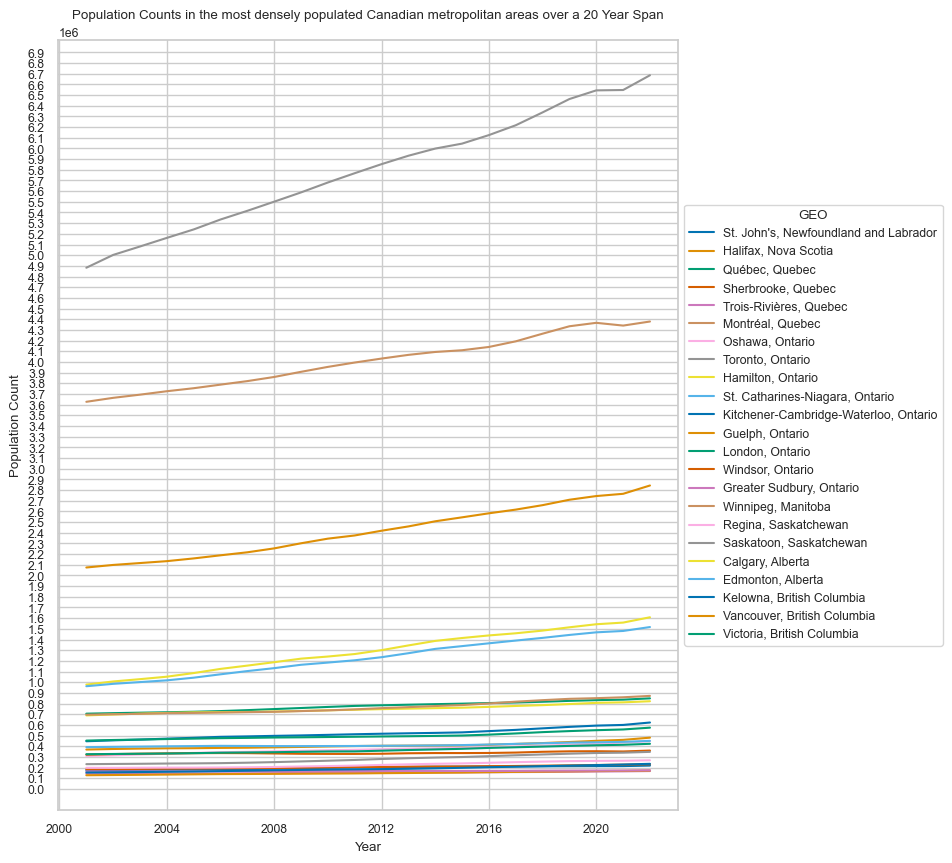

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,10))

pop = sns.lineplot(x='REF_DATE', y='VALUE', hue='GEO', data=PE_Wrangled_Final_all_ages, palette='colorblind')
plt.yticks(range(0, 7000000, 100000))

plt.legend(title="GEO", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Population Count")
plt.title("Population Counts in the most densely populated Canadian metropolitan areas over a 20 Year Span")
plt.show()

### Final Data processing for PopEstimate set
Okay, I have finally managed to visualize the change in population over time for each of the major metropolitan areas, however its hard to infer the actual change as the axis is quite dense to account for the vast differences in population sizes. I think I will instead create a new column for rate of change per year for each area.

In [25]:
rate_change_per_year = pd.DataFrame()
for city in PE_Wrangled_Final_all_ages["GEO"].unique():
    city_list = PE_Wrangled_Final_all_ages.loc[PE_Wrangled_Final_all_ages['GEO'] == city].copy()
    city_list['RATE'] = city_list['VALUE'].pct_change() * 100
    city_list = city_list.dropna()
    rate_change_per_year = pd.concat([rate_change_per_year, city_list], axis=0)
rate_change_per_year

,REF_DATE,GEO,Sex,Age group,UOM,VALUE,RATE
7935,2002-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,177626.0,0.656210
15870,2003-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,179026.0,0.788173
23805,2004-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,181059.0,1.135589
31740,2005-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,181720.0,0.365074
39675,2006-01-01,"St. John's, Newfoundland and Labrador",Both sexes,All ages,Persons,183847.0,1.170482
...,...,...,...,...,...,...,...
142485,2018-01-01,"Victoria, British Columbia",Both sexes,All ages,Persons,396839.0,1.580382
150420,2019-01-01,"Victoria, British Columbia",Both sexes,All ages,Persons,403466.0,1.669947
158355,2020-01-01,"Victoria, British Columbia",Both sexes,All ages,Persons,409398.0,1.470260
166290,2021-01-01,"Victoria, British Columbia",Both sexes,All ages,Persons,413859.0,1.089649


I also think I should calculate the total rate of change over the 20 year period for each metropolitan area. To do so, I created a new dataframe with a GEO column and a rate_total column and then populated the columns using the values from the GEO column in the wrangled dataset and created the total rate values using a for loop.

In [26]:
import warnings as w
w.filterwarnings("ignore", message="The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.")


total_rate_change = pd.DataFrame(columns=["GEO", "rate_total"])

for city in PE_Wrangled_Final_all_ages["GEO"].unique():

    city_df = PE_Wrangled_Final_all_ages[PE_Wrangled_Final_all_ages["GEO"] == city]

    initial_pop = city_df.iloc[0]["VALUE"]
    final_pop = city_df.iloc[-1]["VALUE"]

    rate = (final_pop - initial_pop) / initial_pop * 100

    total_rate_change = total_rate_change.append({"GEO": city, "rate_total": rate}, ignore_index=True)

total_rate_change = total_rate_change.sort_values('rate_total').reset_index()
total_rate_change = total_rate_change.drop(columns=['index'])
total_rate_change

,GEO,rate_total
0,"Greater Sudbury, Ontario",6.788259
1,"Windsor, Ontario",12.064808
2,"St. Catharines-Niagara, Ontario",14.969478
3,"Trois-Rivières, Quebec",16.979342
4,"Hamilton, Ontario",19.249163
5,"Québec, Quebec",20.358590
6,"Montréal, Quebec",20.737784
7,"St. John's, Newfoundland and Labrador",24.169254
8,"Winnipeg, Manitoba",25.286061
9,"Sherbrooke, Quebec",25.822964


### Data Visualizations
Since the yearly rate of change is technically the derivative of the original data, I believe I can now plot it relative to dates and GEO locations in order to get the differentiated graph which should provide for a better visual than before. 

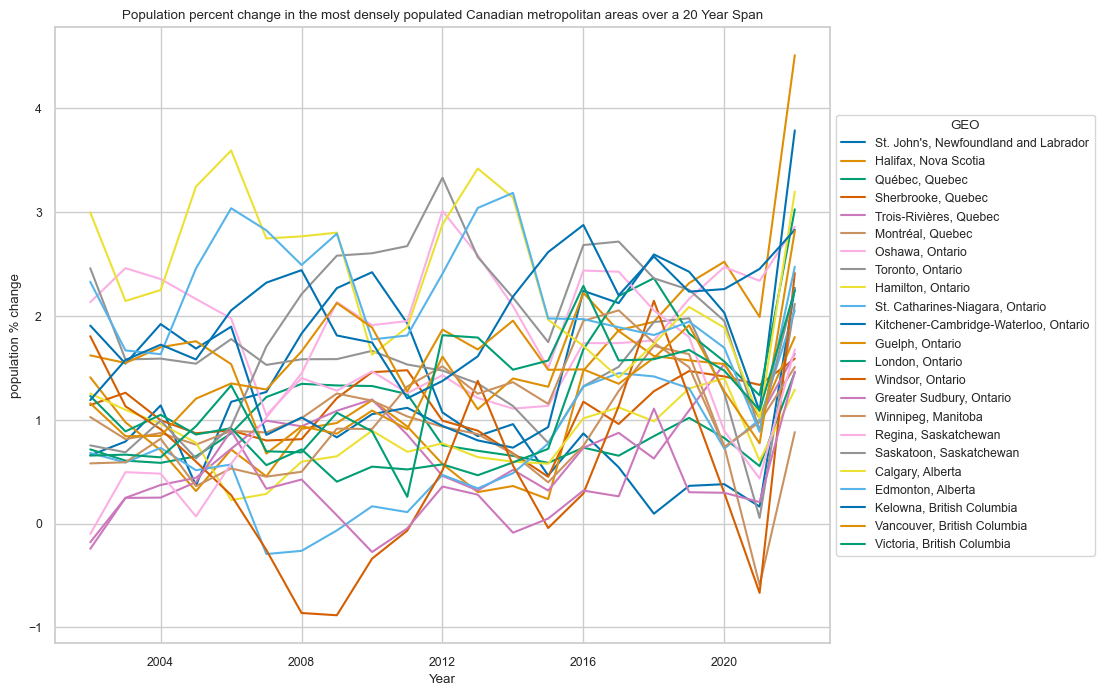

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))

pop = sns.lineplot(x='REF_DATE', y='RATE', hue='GEO', data=rate_change_per_year, palette='colorblind')

plt.legend(title="GEO", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("population % change")
plt.title("Population percent change in the most densely populated Canadian metropolitan areas over a 20 Year Span")
plt.show()

Okay, having 20+ lines on one plot is hard to infer still, so I'll now split them up into individual lines using a facetgrid.

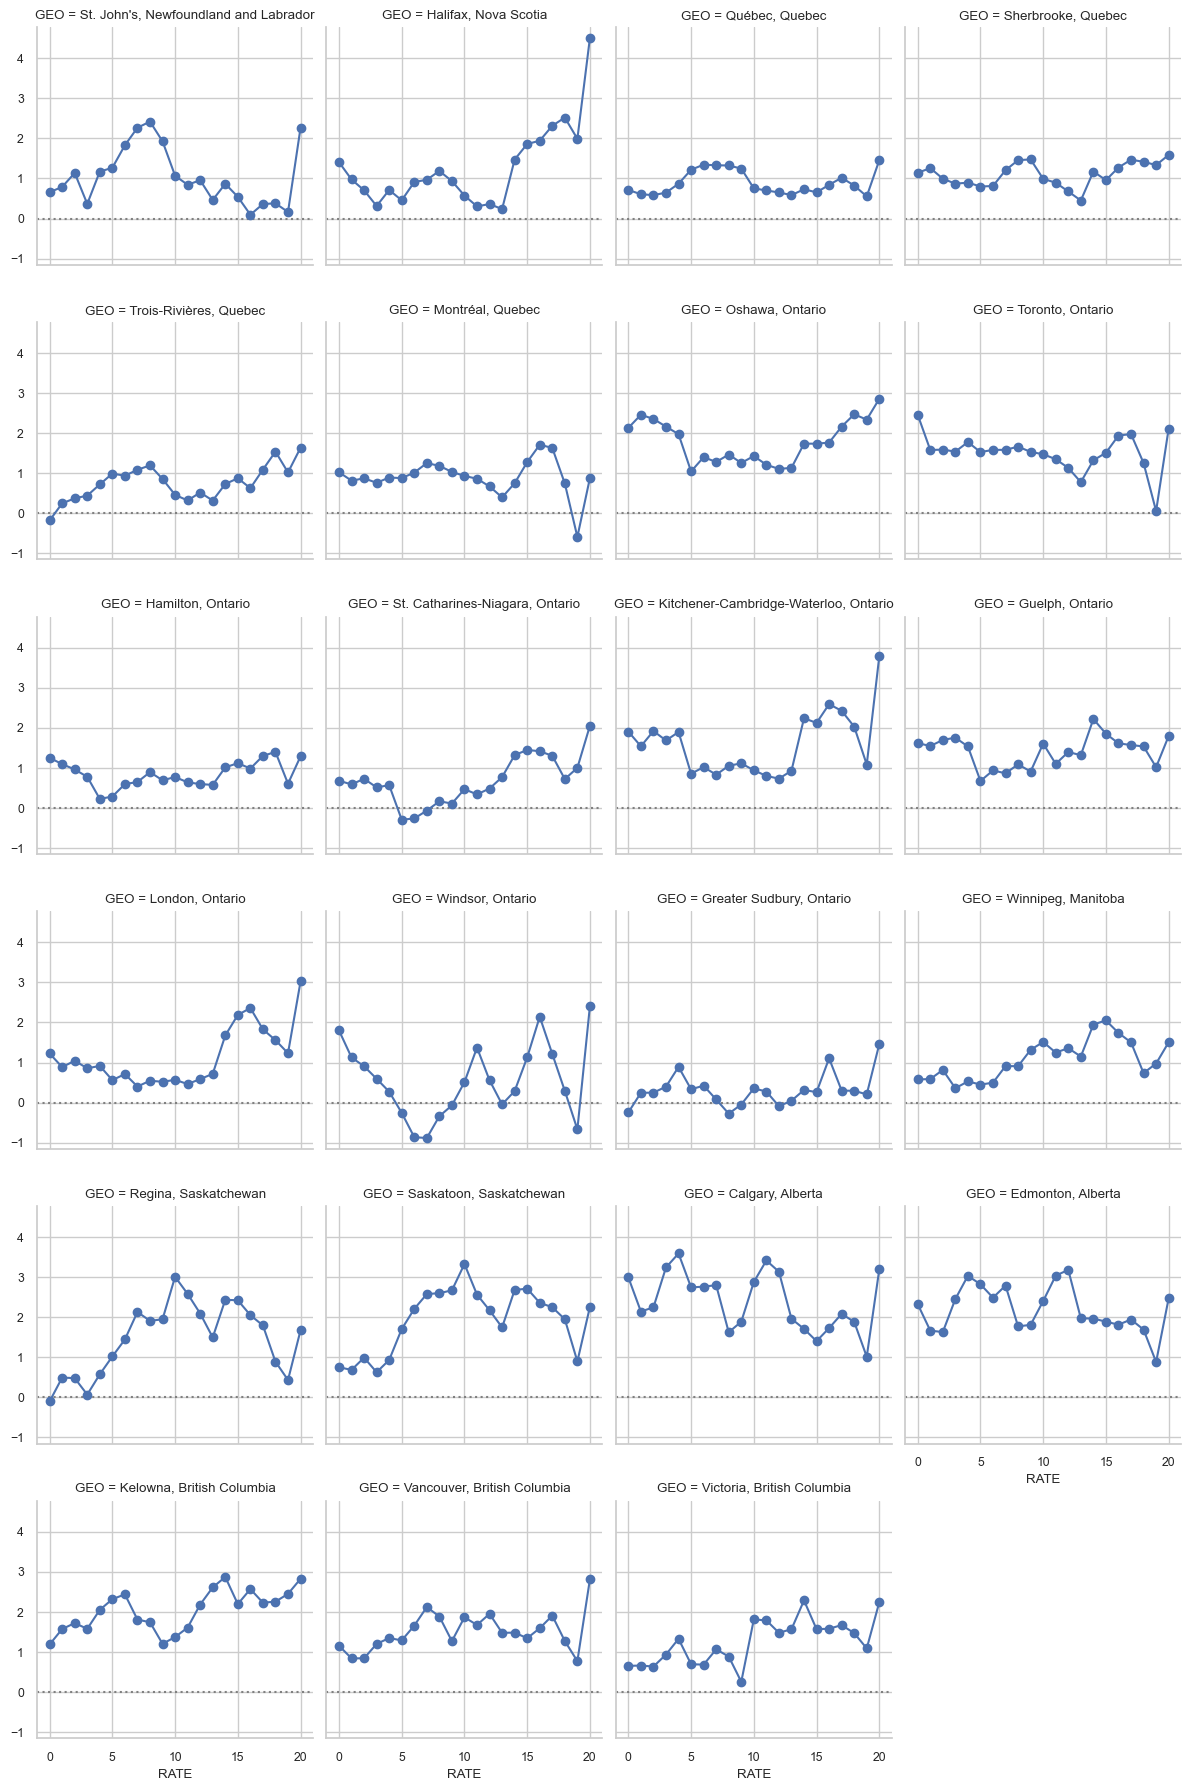

In [28]:
pop_facet = sns.FacetGrid(data=rate_change_per_year, col="GEO", col_wrap=4, height=3, palette="tab20c")
pop_facet.refline(y=0, linestyle=":")
pop_facet.map(plt.plot, "RATE", marker="o")
pop_facet.fig.tight_layout(w_pad=1)
n=None

These look great! Since I have already calculated the total rate of population change over the 20 year period, I will now also plot that on a bar chart to get a clean representation.

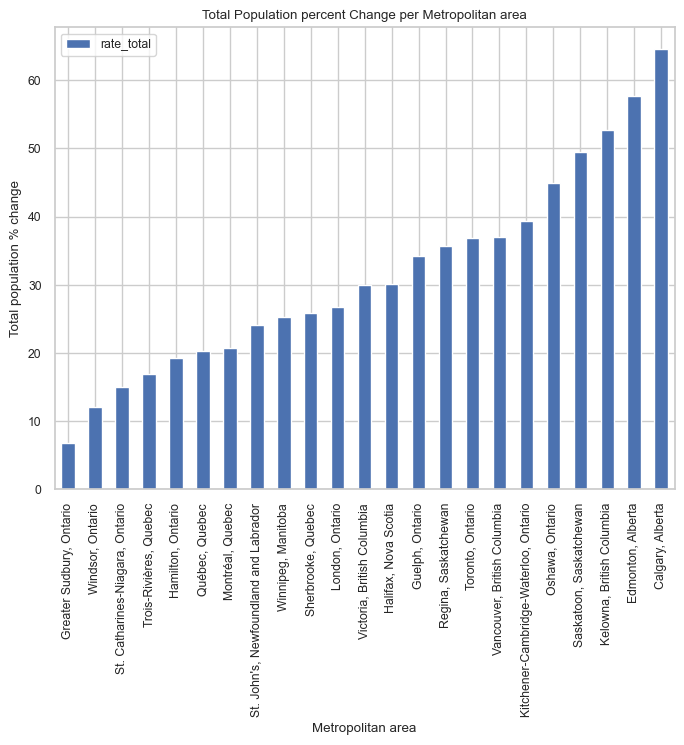

In [29]:
total_rate_change.plot(x="GEO", y="rate_total", kind="bar", figsize=(8, 6))
plt.title("Total Population percent Change per Metropolitan area")
plt.xlabel("Metropolitan area")
plt.ylabel("Total population % change")
plt.show()

Wow! After all this I have finally answered part of my research question! The fastest growing metropolitan area in Canada is Calgary, AB with Edmonton, AB and Kelowna, BC coming in 2nd and 3rd. In the future, I will conduct this same analysis using the wrangled NewHousingPriceIndex and to derive a definitive answer to which metropolitan hub is the most affordable respective to housing cost and inventory. It will be interesting to see if the top three hubs with respect to population growth will also be at the top with respect to cost.

## Part 2, Working with HousingPriceIndex DF
With the PopEst DF out of the way, I will now perform the same cleaning/processing/EDA for the HousingPriceIndex dataframe to eventually reach a workable dataset that has the same columns and filtered rows as PopEst, so that eventually I can merge the relevant columns into a single dataset for my dashboard. To start, I will pick up where I left off previously and filter out the non-conserved metropolitan areas in the NHPI DF. 

In [30]:
NHPI_W_v3.sample(10)

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
8791,2019-04-01,"Regina, Saskatchewan",Total (house and land),"Index, 201612=100",96.3
6223,2013-12-01,"Guelph, Ontario",Total (house and land),"Index, 201612=100",NaN
1863,2004-11-01,"Guelph, Ontario",Total (house and land),"Index, 201612=100",NaN
1105,2003-04-01,"Windsor, Ontario",Total (house and land),"Index, 201612=100",93.2
6911,2015-05-01,"Regina, Saskatchewan",Total (house and land),"Index, 201612=100",100.3
6682,2014-12-01,Newfoundland and Labrador,Total (house and land),"Index, 201612=100",99.9
9044,2019-11-01,Prince Edward Island,Total (house and land),"Index, 201612=100",102.0
3951,2009-03-01,"Regina, Saskatchewan",Total (house and land),"Index, 201612=100",84.8
721,2002-07-01,Atlantic Region,Total (house and land),"Index, 201612=100",66.7
8875,2019-06-01,"Edmonton, Alberta",Total (house and land),"Index, 201612=100",98.6


In [31]:
unique_regions(NHPI_W_v3, PE_Wrangled_Final_all_ages, col_name='GEO')

[{'Alberta',
  'Atlantic Region',
  'British Columbia',
  'Canada',
  'Charlottetown, Prince Edward Island',
  'Manitoba',
  'New Brunswick',
  'Newfoundland and Labrador',
  'Nova Scotia',
  'Ontario',
  'Ottawa-Gatineau, Ontario part, Ontario/Quebec',
  'Ottawa-Gatineau, Quebec part, Ontario/Quebec',
  'Prairie Region',
  'Prince Edward Island',
  'Quebec',
  'Saint John, Fredericton, and Moncton, New Brunswick',
  'Saskatchewan'},
 set()]

I believe I had already determined this in the prior part, however I needed a referesher. Now, I'll drop these from the NHPI_W_v3, create columns for the change in value per region over the time period and per year. Then I'll attempt to visualize what im working with.

In [32]:
NHPI_W_Final = NHPI_W_v3.drop(NHPI_W_v3[NHPI_W_v3.GEO.isin(['Alberta','Atlantic Region','British Columbia','Canada','Charlottetown, Prince Edward Island','Manitoba','New Brunswick','Newfoundland and Labrador','Nova Scotia','Ontario','Ottawa-Gatineau, Ontario part, Ontario/Quebec','Ottawa-Gatineau, Quebec part, Ontario/Quebec','Prairie Region','Prince Edward Island','Quebec','Saint John, Fredericton, and Moncton, New Brunswick','Saskatchewan'])].index).reset_index().drop(columns=["index"])
NHPI_W_Final.head(15)

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,2001-01-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",49.5
1,2001-01-01,"Halifax, Nova Scotia",Total (house and land),"Index, 201612=100",66.3
2,2001-01-01,"Québec, Quebec",Total (house and land),"Index, 201612=100",58.6
3,2001-01-01,"Sherbrooke, Quebec",Total (house and land),"Index, 201612=100",NaN
4,2001-01-01,"Trois-Rivières, Quebec",Total (house and land),"Index, 201612=100",NaN
5,2001-01-01,"Montréal, Quebec",Total (house and land),"Index, 201612=100",59.4
6,2001-01-01,"Oshawa, Ontario",Total (house and land),"Index, 201612=100",NaN
7,2001-01-01,"Toronto, Ontario",Total (house and land),"Index, 201612=100",55.8
8,2001-01-01,"Hamilton, Ontario",Total (house and land),"Index, 201612=100",60.4
9,2001-01-01,"St. Catharines-Niagara, Ontario",Total (house and land),"Index, 201612=100",61.1


In [33]:
rate_change_per_year_NHPI = pd.DataFrame()
for city in NHPI_W_Final["GEO"].unique():
    city_list = NHPI_W_Final.loc[NHPI_W_Final['GEO'] == city].copy()
    city_list['RATE'] = city_list['VALUE'].pct_change() * 100
    city_list = city_list.dropna()
    rate_change_per_year_NHPI = pd.concat([rate_change_per_year_NHPI, city_list], axis=0)
rate_change_per_year_NHPI.head(15)

,REF_DATE,GEO,New housing price indexes,UOM,VALUE,RATE
23,2001-02-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",49.5,0.000000
46,2001-03-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",49.5,0.000000
69,2001-04-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",49.5,0.000000
92,2001-05-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",49.6,0.202020
115,2001-06-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",49.4,-0.403226
138,2001-07-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",50.6,2.429150
161,2001-08-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",50.6,0.000000
184,2001-09-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",50.6,0.000000
207,2001-10-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",50.6,0.000000
230,2001-11-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",50.6,0.000000


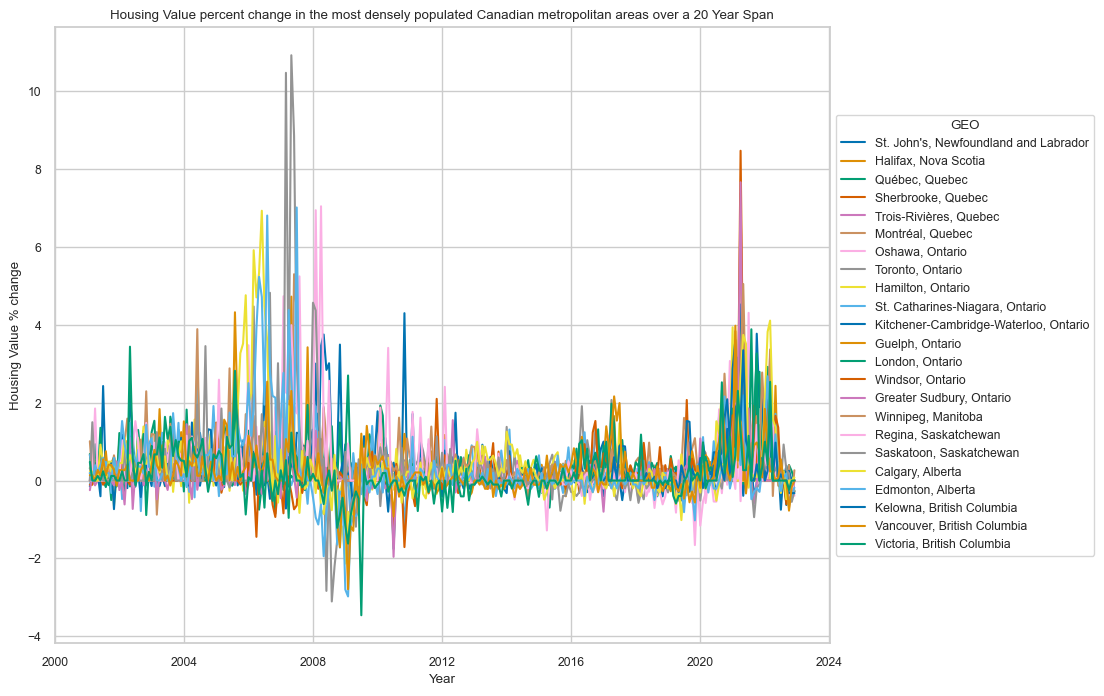

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))

pop = sns.lineplot(x='REF_DATE', y='RATE', hue='GEO', data=rate_change_per_year_NHPI, palette='colorblind')

plt.legend(title="GEO", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Housing Value % change")
plt.title("Housing Value percent change in the most densely populated Canadian metropolitan areas over a 20 Year Span")
plt.show()

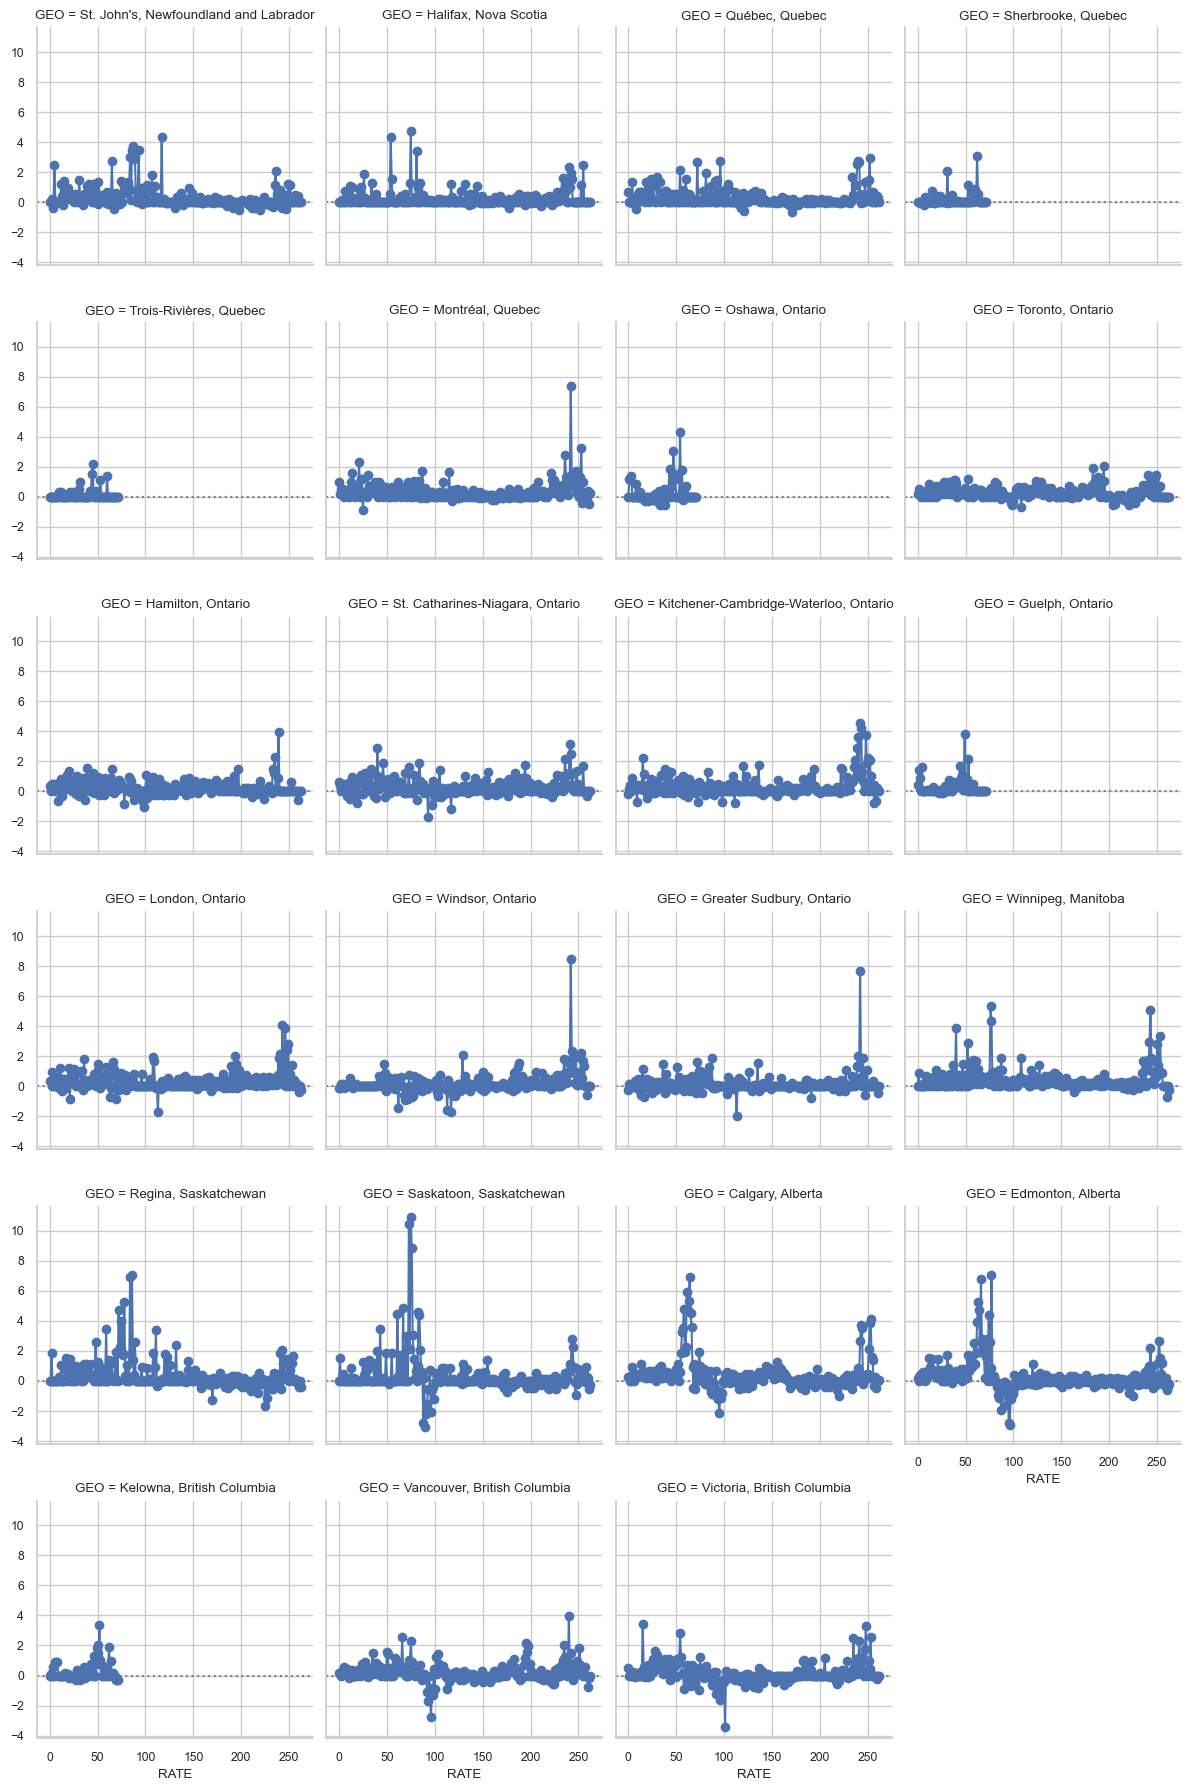

In [35]:
pop_facet1 = sns.FacetGrid(data=rate_change_per_year_NHPI, col="GEO", col_wrap=4, height=3, palette="tab20c")
pop_facet1.refline(y=0, linestyle=":")
pop_facet1.map(plt.plot, "RATE", marker="o")
pop_facet1.fig.tight_layout(w_pad=1)
n=None

In [36]:
import warnings as w
w.filterwarnings("ignore", message="The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.")


total_rate_change_NHPI = pd.DataFrame(columns=["GEO", "rate_total"])

for city in NHPI_W_Final["GEO"].unique():

    city_df = NHPI_W_Final[NHPI_W_Final["GEO"] == city]

    initial_value = city_df.iloc[0]["VALUE"]
    final_value = city_df.iloc[-1]["VALUE"]

    rate = (final_value - initial_value) / initial_value * 100

    total_rate_change_NHPI = total_rate_change_NHPI.append({"GEO": city, "rate_total": rate}, ignore_index=True)

total_rate_change_NHPI = total_rate_change_NHPI.sort_values('rate_total').reset_index()
total_rate_change_NHPI = total_rate_change_NHPI.drop(columns=['index'])
total_rate_change_NHPI

,GEO,rate_total
0,"Greater Sudbury, Ontario",49.691739
1,"Victoria, British Columbia",50.060024
2,"Windsor, Ontario",59.267241
3,"Vancouver, British Columbia",76.341128
4,"Halifax, Nova Scotia",84.012066
5,"Hamilton, Ontario",92.218543
6,"Toronto, Ontario",107.168459
7,"St. Catharines-Niagara, Ontario",112.929624
8,"St. John's, Newfoundland and Labrador",113.333333
9,"Québec, Quebec",115.187713


This partially works, however I have NaN values for some of the major metro areas, so I'll modify the code to insteas locate the first and final non-NaN values instead of just using the first and last entries.

In [37]:
total_rate_change_NHPI_noNaN = pd.DataFrame(columns=["GEO", "rate_total"])

for city in NHPI_W_Final["GEO"].unique():

    city_df = NHPI_W_Final[NHPI_W_Final["GEO"] == city]

    initial_value = city_df.loc[city_df["VALUE"].first_valid_index()]["VALUE"]
    final_value = city_df.loc[city_df["VALUE"].last_valid_index()]["VALUE"]

    rate = (final_value - initial_value) / initial_value * 100

    total_rate_change_NHPI_noNaN = total_rate_change_NHPI_noNaN.append({"GEO": city, "rate_total": rate}, ignore_index=True)

total_rate_change_NHPI_noNaN = total_rate_change_NHPI_noNaN.sort_values('rate_total').reset_index(drop=True)
total_rate_change_NHPI_noNaN

,GEO,rate_total
0,"Trois-Rivières, Quebec",11.000000
1,"Sherbrooke, Quebec",11.500000
2,"Oshawa, Ontario",22.000000
3,"Kelowna, British Columbia",23.400000
4,"Guelph, Ontario",24.000000
5,"Greater Sudbury, Ontario",49.691739
6,"Victoria, British Columbia",50.060024
7,"Windsor, Ontario",59.267241
8,"Vancouver, British Columbia",76.341128
9,"Halifax, Nova Scotia",84.012066


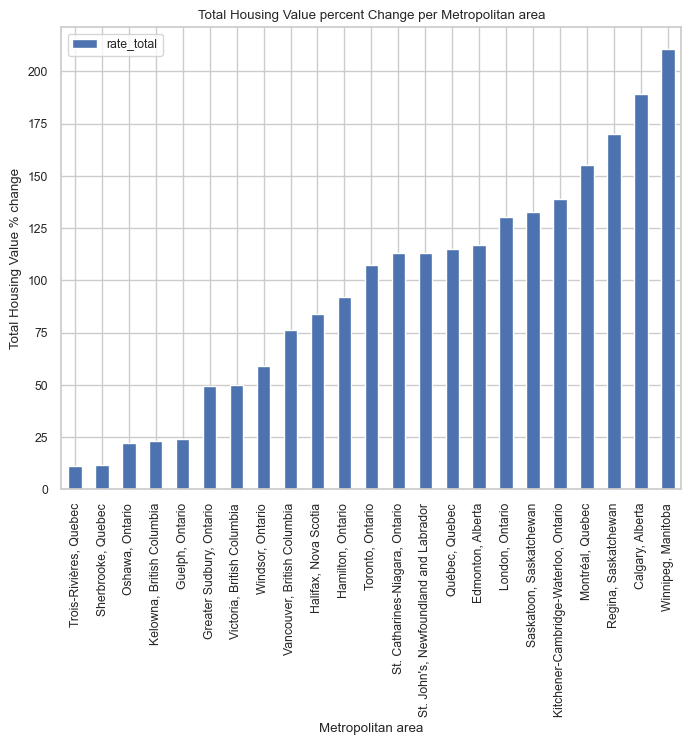

In [38]:
total_rate_change_NHPI_noNaN.plot(x="GEO", y="rate_total", kind="bar", figsize=(8, 6))
plt.title("Total Housing Value percent Change per Metropolitan area")
plt.xlabel("Metropolitan area")
plt.ylabel("Total Housing Value % change")
plt.show()

After all this I have finally answered the second part of my research question! From the bar chart, I can see that Winnipeg has had the largest increase in housing price over 20 years, with Calgary and Regina coming in 2nd and 3rd place. Interestingly, Calgary had the largest change in population and also a large change in price. Kelowna, which was 3rd in population increase is 20th in housing price increase. I believe this may be due to Kelowna being a lake city, which would have kept the price high even 20 years ago as it is desirable.

## Part 3, Working with NewInventory DF

Now, I will be repeating the cleaning/processing detailed in part 1 and 2 with the final dataset needed for my analysis.

In [39]:
NewInventory.sample(5)

,REF_DATE,GEO,DGUID,Housing estimates,Type of unit,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
161821,1998-08,"St. John's, Newfoundland and Labrador",2011S0503001,Housing starts,Single-detached units,Units,300,units,0,v42127386,18.1.2,71,NaN,NaN,NaN,0
182001,2001-10,"Abbotsford-Mission, British Columbia",2011S0503932,Housing under construction,Single-detached units,Units,300,units,0,v42127601,30.2.2,190,NaN,NaN,NaN,0
295193,2019-03,"St. Catharines-Niagara, Ontario",2011S0503539,Housing under construction,Row units,Units,300,units,0,v42127363,16.2.4,711,NaN,NaN,NaN,0
174632,2000-08,"Moncton, New Brunswick",2011S0503305,Housing starts,Semi-detached units,Units,300,units,0,v42135839,36.1.3,6,NaN,NaN,NaN,0
158862,1998-03,"Greater Sudbury, Ontario",2011S0503580,Housing completions,Semi-detached units,Units,300,units,0,v42127457,21.3.3,2,NaN,NaN,NaN,0


Looking at the data sample, I'll need to trim the erraneous columns, change the REF_DATE to datetime, filter the data to align with right date cutoff, include only Housing Completions, and keep only the top metro areas that I have conserved between the last two datasets. 

In [40]:
NI_Wrangled = NewInventory.drop(columns=['DGUID', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], axis=1).reset_index().drop(columns=["index"])

NI_Wrangled['REF_DATE'] = pd.to_datetime(NI_Wrangled['REF_DATE'])
NI_Wrangled = NI_Wrangled[~(NI_Wrangled['REF_DATE'] < '2001-01-01')].reset_index().drop(columns=["index"])

NI_Wrangled.head(10)

,REF_DATE,GEO,Housing estimates,Type of unit,UOM,VALUE
0,2001-01-01,Census metropolitan areas,Housing starts,Total units,Units,7790
1,2001-01-01,Census metropolitan areas,Housing starts,Single-detached units,Units,3455
2,2001-01-01,Census metropolitan areas,Housing starts,Semi-detached units,Units,701
3,2001-01-01,Census metropolitan areas,Housing starts,Row units,Units,709
4,2001-01-01,Census metropolitan areas,Housing starts,Apartment and other unit types,Units,2925
5,2001-01-01,Census metropolitan areas,Housing under construction,Total units,Units,67549
6,2001-01-01,Census metropolitan areas,Housing under construction,Single-detached units,Units,23054
7,2001-01-01,Census metropolitan areas,Housing under construction,Semi-detached units,Units,4928
8,2001-01-01,Census metropolitan areas,Housing under construction,Row units,Units,8592
9,2001-01-01,Census metropolitan areas,Housing under construction,Apartment and other unit types,Units,30975


In [41]:
NI_Wrangled_totals_completions = NI_Wrangled.drop(NI_Wrangled[NI_Wrangled['Housing estimates'] != 'Housing completions'].index)
NI_Wrangled_totals_completions = NI_Wrangled_totals_completions.drop(NI_Wrangled_totals_completions[NI_Wrangled['Type of unit'] != 'Total units'].index)
NI_Wrangled_totals_completions.reset_index().drop(columns=["index"])

/var/folders/v9/f2hd85ns75q9chg2z10c7wcc0000gn/T/ipykernel_37624/3895428860.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  NI_Wrangled_totals_completions = NI_Wrangled_totals_completions.drop(NI_Wrangled_totals_completions[NI_Wrangled['Type of unit'] != 'Total units'].index)


,REF_DATE,GEO,Housing estimates,Type of unit,UOM,VALUE
0,2001-01-01,Census metropolitan areas,Housing completions,Total units,Units,8518
1,2001-01-01,"Abbotsford-Mission, British Columbia",Housing completions,Total units,Units,41
2,2001-01-01,"Barrie, Ontario",Housing completions,Total units,Units,148
3,2001-01-01,"Brantford, Ontario",Housing completions,Total units,Units,5
4,2001-01-01,"Calgary, Alberta",Housing completions,Total units,Units,1197
...,...,...,...,...,...,...
9499,2022-12-01,"Trois-Rivières, Quebec",Housing completions,Total units,Units,93
9500,2022-12-01,"Vancouver, British Columbia",Housing completions,Total units,Units,1625
9501,2022-12-01,"Victoria, British Columbia",Housing completions,Total units,Units,306
9502,2022-12-01,"Windsor, Ontario",Housing completions,Total units,Units,60


In [42]:
unique_regions(NI_Wrangled_totals_completions, NHPI_W_Final, col_name='GEO')

[{'Abbotsford-Mission, British Columbia',
  'Barrie, Ontario',
  'Brantford, Ontario',
  'Census metropolitan areas',
  'Kingston, Ontario',
  'Moncton, New Brunswick',
  'Ottawa-Gatineau, Ontario part, Ontario/Quebec',
  'Ottawa-Gatineau, Ontario/Quebec',
  'Ottawa-Gatineau, Quebec part, Ontario/Quebec',
  'Peterborough, Ontario',
  'Saguenay, Quebec',
  'Saint John, New Brunswick',
  'Thunder Bay, Ontario'},
 set()]

In [43]:
NI_Wrangled_Final = NI_Wrangled_totals_completions.drop(NI_Wrangled_totals_completions[NI_Wrangled_totals_completions.GEO.isin(['Abbotsford-Mission, British Columbia','Barrie, Ontario','Brantford, Ontario','Census metropolitan areas','Kingston, Ontario','Moncton, New Brunswick','Ottawa-Gatineau, Ontario part, Ontario/Quebec','Ottawa-Gatineau, Ontario/Quebec','Ottawa-Gatineau, Quebec part, Ontario/Quebec','Peterborough, Ontario','Saguenay, Quebec','Saint John, New Brunswick','Thunder Bay, Ontario'])].index).reset_index().drop(columns=["index"])
NI_Wrangled_Final.head(15)

,REF_DATE,GEO,Housing estimates,Type of unit,UOM,VALUE
0,2001-01-01,"Calgary, Alberta",Housing completions,Total units,Units,1197
1,2001-01-01,"Edmonton, Alberta",Housing completions,Total units,Units,451
2,2001-01-01,"Greater Sudbury, Ontario",Housing completions,Total units,Units,11
3,2001-01-01,"Guelph, Ontario",Housing completions,Total units,Units,73
4,2001-01-01,"Halifax, Nova Scotia",Housing completions,Total units,Units,55
5,2001-01-01,"Hamilton, Ontario",Housing completions,Total units,Units,282
6,2001-01-01,"Kelowna, British Columbia",Housing completions,Total units,Units,25
7,2001-01-01,"Kitchener-Cambridge-Waterloo, Ontario",Housing completions,Total units,Units,174
8,2001-01-01,"London, Ontario",Housing completions,Total units,Units,84
9,2001-01-01,"Montréal, Quebec",Housing completions,Total units,Units,538


Viola! Now, I have created a clean dataset for NewInventory. I'll now assess the rate of change on a yearly and total basis. Afterwards, I'll recreate the prior plots with this new data and make sense of it.

In [44]:
rate_change_per_year_NI = pd.DataFrame()
for city in NI_Wrangled_Final["GEO"].unique():
    city_list = NI_Wrangled_Final.loc[NI_Wrangled_Final['GEO'] == city].copy()
    city_list['RATE'] = city_list['VALUE'].pct_change() * 100
    city_list = city_list.dropna()
    rate_change_per_year_NI = pd.concat([rate_change_per_year_NI, city_list], axis=0)
rate_change_per_year_NI

,REF_DATE,GEO,Housing estimates,Type of unit,UOM,VALUE,RATE
23,2001-02-01,"Calgary, Alberta",Housing completions,Total units,Units,995,-16.875522
46,2001-03-01,"Calgary, Alberta",Housing completions,Total units,Units,592,-40.502513
69,2001-04-01,"Calgary, Alberta",Housing completions,Total units,Units,1092,84.459459
92,2001-05-01,"Calgary, Alberta",Housing completions,Total units,Units,699,-35.989011
115,2001-06-01,"Calgary, Alberta",Housing completions,Total units,Units,1026,46.781116
...,...,...,...,...,...,...,...
5979,2022-08-01,"Winnipeg, Manitoba",Housing completions,Total units,Units,332,12.542373
6002,2022-09-01,"Winnipeg, Manitoba",Housing completions,Total units,Units,176,-46.987952
6025,2022-10-01,"Winnipeg, Manitoba",Housing completions,Total units,Units,597,239.204545
6048,2022-11-01,"Winnipeg, Manitoba",Housing completions,Total units,Units,311,-47.906198


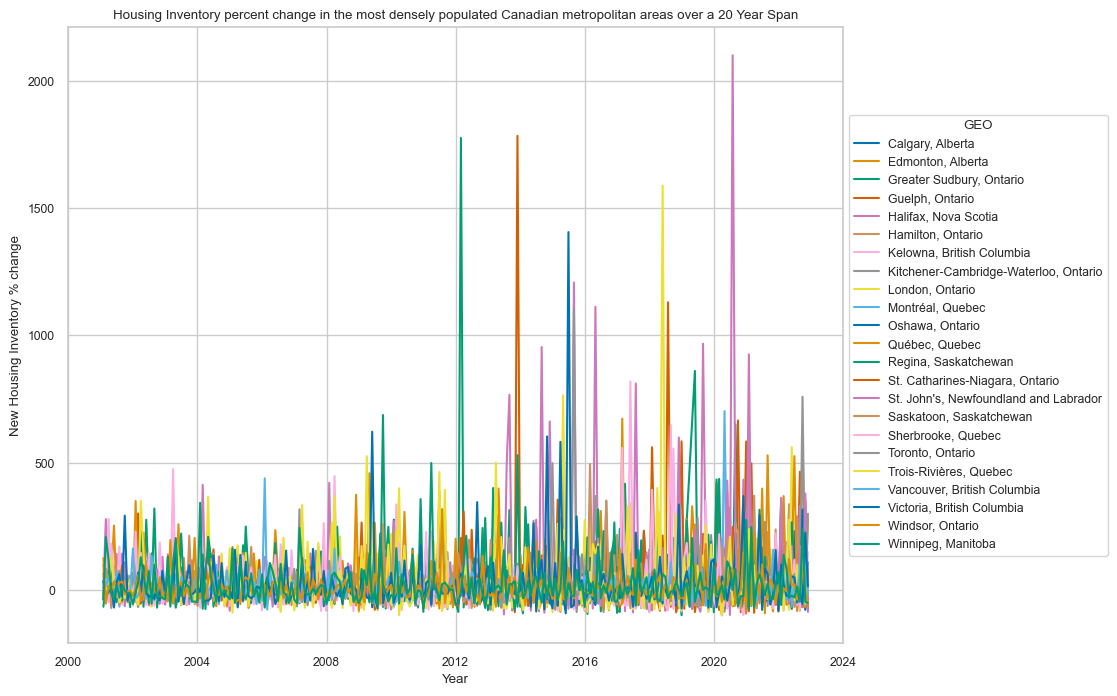

In [45]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))

pop = sns.lineplot(x='REF_DATE', y='RATE', hue='GEO', data=rate_change_per_year_NI, palette='colorblind')

plt.legend(title="GEO", loc="center left", bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("New Housing Inventory % change")
plt.title("Housing Inventory percent change in the most densely populated Canadian metropolitan areas over a 20 Year Span")
plt.show()

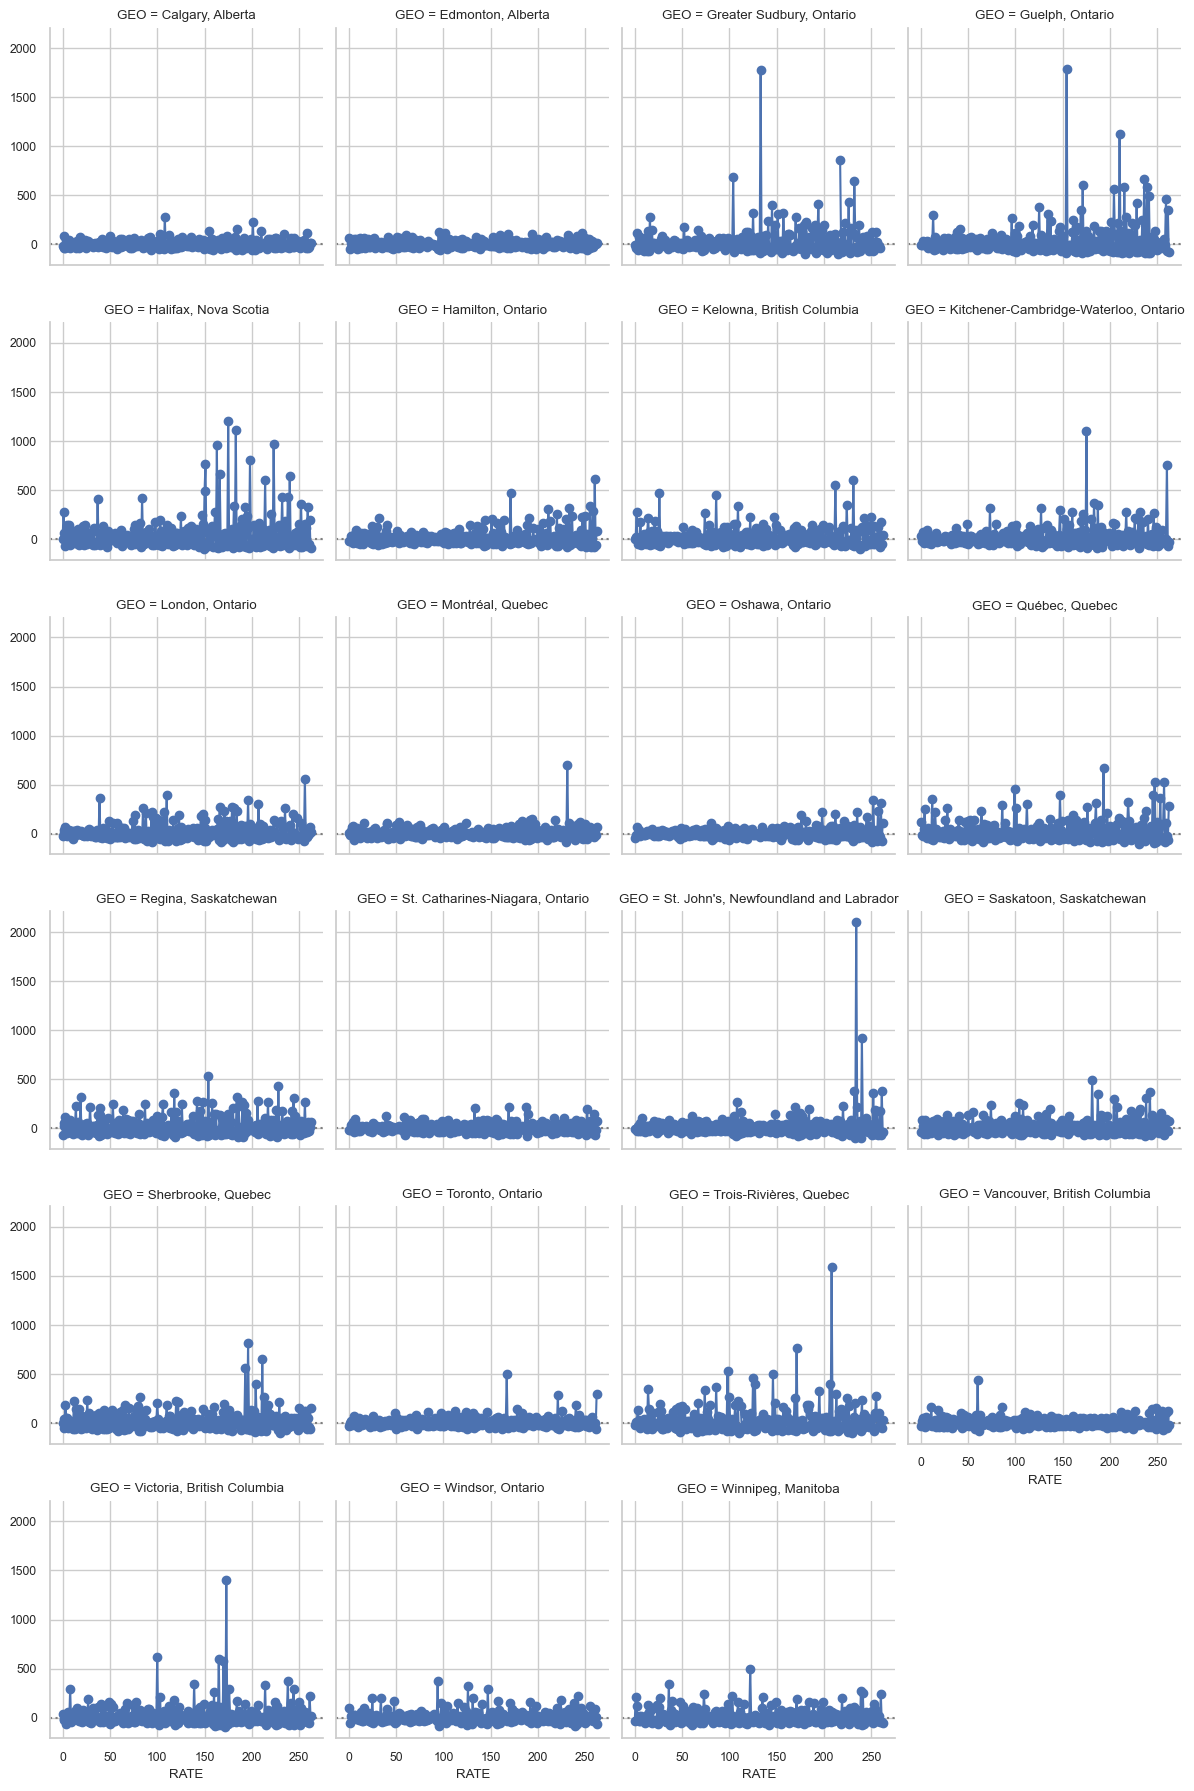

In [46]:
pop_facet2 = sns.FacetGrid(data=rate_change_per_year_NI, col="GEO", col_wrap=4, height=3, palette="tab20c")
pop_facet2.refline(y=0, linestyle=":")
pop_facet2.map(plt.plot, "RATE", marker="o")
pop_facet2.fig.tight_layout(w_pad=1)
n=None

In [47]:
import warnings as w
w.filterwarnings("ignore", message="The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.")


total_rate_change_NI = pd.DataFrame(columns=["GEO", "rate_total"])

for city in NI_Wrangled_Final["GEO"].unique():

    city_df = NI_Wrangled_Final[NI_Wrangled_Final["GEO"] == city]

    initial_value = city_df.iloc[0]["VALUE"]
    final_value = city_df.iloc[-1]["VALUE"]

    rate = (final_value - initial_value) / initial_value * 100

    total_rate_change_NI = total_rate_change_NI.append({"GEO": city, "rate_total": rate}, ignore_index=True)

total_rate_change_NI = total_rate_change_NI.sort_values('rate_total').reset_index()
total_rate_change_NI = total_rate_change_NI.drop(columns=['index'])
total_rate_change_NI

,GEO,rate_total
0,"Guelph, Ontario",-47.945205
1,"Windsor, Ontario",-44.954128
2,"St. John's, Newfoundland and Labrador",-19.753086
3,"Toronto, Ontario",-9.088428
4,"Calgary, Alberta",6.432749
5,"Greater Sudbury, Ontario",9.090909
6,"Oshawa, Ontario",26.582278
7,"Kitchener-Cambridge-Waterloo, Ontario",39.655172
8,"Regina, Saskatchewan",71.929825
9,"Halifax, Nova Scotia",81.818182


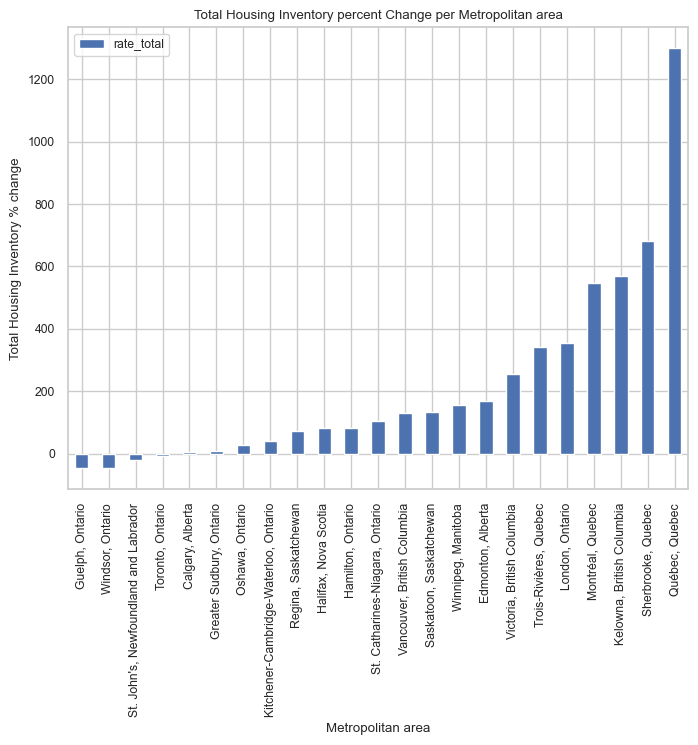

In [48]:
total_rate_change_NI.plot(x="GEO", y="rate_total", kind="bar", figsize=(8, 6))
plt.title("Total Housing Inventory percent Change per Metropolitan area")
plt.xlabel("Metropolitan area")
plt.ylabel("Total Housing Inventory % change")
plt.show()

After all this I have finally answered the third part of my research question! From the bar chart, I can infer that Quebec has has the highest inventory percent change of all metropolitan areas. In 3rd comes Kelowna again, which is suprising to me since it has limited area to expand as it is in a valley and surounded by the lake, however so many plots have been bought and converted to apartments, so I can understand how inventory has, in fact, increased. As for Calgary, there has been little total inventory change. The validity of this result will be assessed further.